In [6]:
# Import necessary libraries

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

In [7]:
# Connect to the database

root_dir = Path.cwd().parent
db_path = root_dir / 'data' / 'spotify_tracks.db'
conn = sqlite3.connect(db_path)

In [10]:
# 3. Load data into a DataFrame
df = pd.read_sql_query("SELECT * FROM tracks", conn)

In [16]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              50 non-null     object 
 1   rank              50 non-null     int64  
 2   track_id          50 non-null     object 
 3   name              50 non-null     object 
 4   artist            50 non-null     object 
 5   popularity        50 non-null     int64  
 6   danceability      50 non-null     float64
 7   energy            50 non-null     float64
 8   key               50 non-null     int64  
 9   loudness          50 non-null     float64
 10  mode              50 non-null     int64  
 11  speechiness       50 non-null     float64
 12  acousticness      50 non-null     float64
 13  instrumentalness  50 non-null     float64
 14  liveness          50 non-null     float64
 15  valence           50 non-null     float64
 16  tempo             50 non-null     float64
 17 

In [19]:
print(df.isnull().sum())

date                0
rank                0
track_id            0
name                0
artist              0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64


In [21]:
print(df.describe())

           rank  popularity  danceability     energy        key   loudness  \
count  50.00000   50.000000     50.000000  50.000000  50.000000  50.000000   
mean   25.50000   89.080000      0.642240   0.674320   6.220000  -6.039760   
std    14.57738    7.102285      0.144203   0.158599   3.764984   2.016525   
min     1.00000   53.000000      0.264000   0.247000   0.000000 -12.002000   
25%    13.25000   88.000000      0.546750   0.583750   3.000000  -7.376250   
50%    25.50000   91.000000      0.664500   0.699500   7.000000  -5.606000   
75%    37.75000   92.000000      0.745750   0.759750   9.000000  -4.690250   
max    50.00000  100.000000      0.924000   0.957000  11.000000  -2.777000   

            mode  speechiness  acousticness  instrumentalness   liveness  \
count  50.000000    50.000000     50.000000         50.000000  50.000000   
mean    0.620000     0.056448      0.162443          0.020785   0.140302   
std     0.490314     0.043278      0.198997          0.072493   0.097

In [23]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())


Unique values in date:
date
2024-09-05    50
Name: count, dtype: int64

Unique values in track_id:
track_id
2plbrEY59IikOBgBGLjaoe    1
3QaPy1KgI7nu9FJEQUgn6h    1
102YUQbYmwdBXS7jwamI90    1
5XeFesFbtLpXzIVDNQP22n    1
1BJJbSX6muJVF2AK7uH1x4    1
4xdBrk0nFZaP54vvZj0yx7    1
3qhlB30KknSejmIvZZLjOD    1
3AJwUDP919kvQ9QcozQPxg    1
1BxfuPKGuaTgP7aM0Bbdwr    1
3JG1uFc40wfyrqaWC7iv0e    1
2uqYupMHANxnwgeiXTZXzd    1
3Vr3zh0r7ALn8VLqCiRR10    1
21B4gaTWnTkuSh77iWEXdS    1
6dOtVTDdiauQNBQEDOtlAB    1
51rfRCiUSvxXlCSCfIztBy    1
2gmd7lY3QSzLh0xIY4cRvi    1
1XBYiRV30ykHw5f4wm6qEn    1
2mtVxf50BYsKNtQoz8sfzm    1
7bywjHOc0wSjGGbj04XbVi    1
42wdz3j7gstgUuhoFLCXqd    1
7KA4W4McWYRpgf0fWsJZWB    1
42VsgItocQwOQC3XWZ8JNA    1
51eSHglvG1RJXtL3qI5trr    1
19RybK6XDbAVpcdxSbZL1o    1
5496lks6V3fh1mZAB6IAap    1
51ZQ1vr10ffzbwIjDCwqm4    1
7ov3TDp5D00Rnu5R1viX4w    1
0QZ5yyl6B6utIWkxeBDxQN    1
5G2f63n7IPVPPjfNIGih7Q    1
7tI8dRuH2Yc6RuoTjxo4dU    1
2qSkIjg1o9h3YT9RAgYN75    1
5N3hjp1WNayUPZrA8kJmJP 

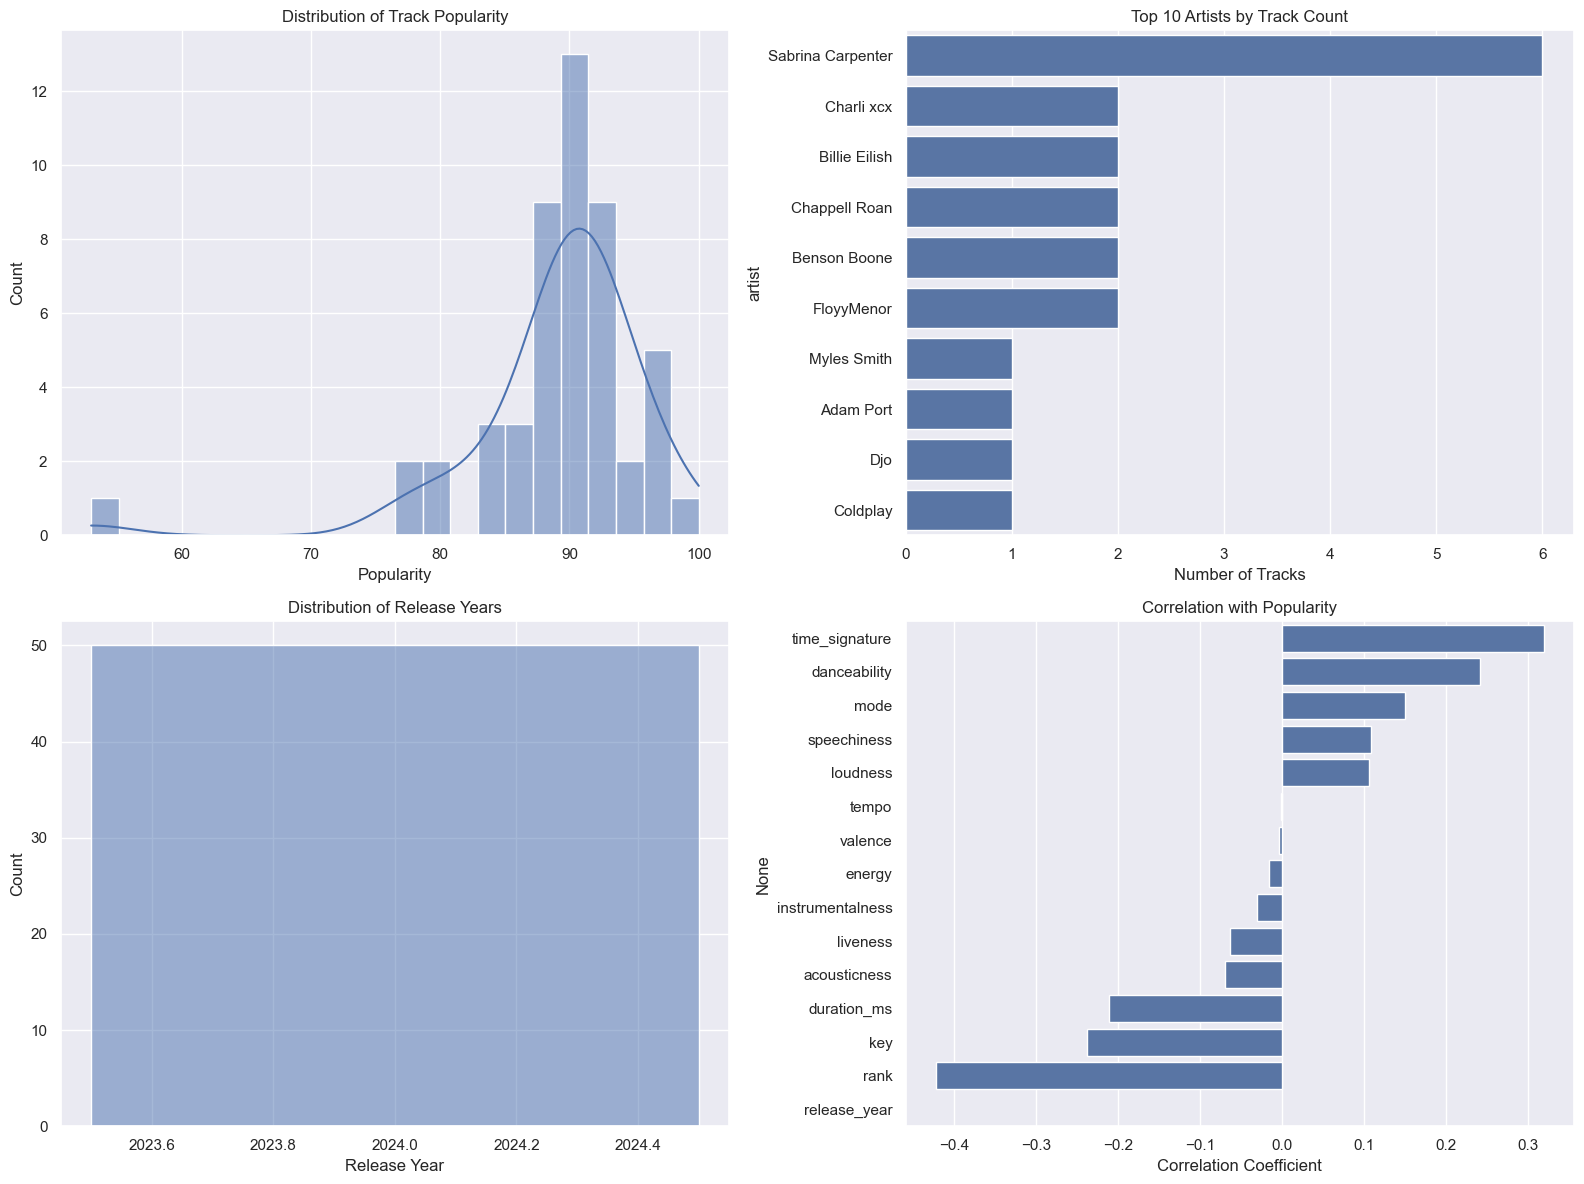

In [43]:
#set up plotting style 
sns.set_theme()

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Popularity distribution
sns.histplot(data=df, x='popularity', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Track Popularity')
axes[0, 0].set_xlabel('Popularity')

# 2. Top 10 artists by track count
top_artists = df['artist'].value_counts().head(10)
sns.barplot(x=top_artists.values, y=top_artists.index, ax=axes[0, 1])
axes[0, 1].set_title('Top 10 Artists by Track Count')
axes[0, 1].set_xlabel('Number of Tracks')

# 3. Release year distribution
df['release_year'] = pd.to_datetime(df['date']).dt.year
sns.histplot(data=df, x='release_year', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Release Years')
axes[1, 0].set_xlabel('Release Year')

# 4. Correlation between popularity and other numeric features
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlations = df[numeric_cols].corr()['popularity'].sort_values(ascending=False)
sns.barplot(x=correlations.values[1:], y=correlations.index[1:], ax=axes[1, 1])
axes[1, 1].set_title('Correlation with Popularity')
axes[1, 1].set_xlabel('Correlation Coefficient')

plt.tight_layout()
plt.show()